<a href="https://colab.research.google.com/github/jnam4/BIA660-Web-Mining-Projects/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Part II
## Group 3: Emily Su, Jiyun Nam, Ruitong Sun


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('rottentomatoes_movies_scraped.csv')
df_info = df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     977 non-null    object
 1   Audience Score            879 non-null    object
 2   Collapsed Audience Score  878 non-null    object
 3   Critics Score             878 non-null    object
 4   Critics Reviews           878 non-null    object
 5   Verified Ratings          871 non-null    object
 6   Director                  878 non-null    object
 7   Rating                    564 non-null    object
 8   Language                  879 non-null    object
 9   Box Office                506 non-null    object
 10  Runtime                   877 non-null    object
 11  Genre                     879 non-null    object
 12  Distributor               764 non-null    object
 13  Production Co             860 non-null    object
 14  Critics Consensus         

(None,
                        Title Audience Score Collapsed Audience Score  \
 0  Ballistic: Ecks vs. Sever            21%                      21%   
 1            One Missed Call            29%                      29%   
 2                Left Behind            20%                      20%   
 3           A Thousand Words            46%                      46%   
 4                      Gotti            44%                      44%   
 
   Critics Score Critics Reviews Verified Ratings           Director  \
 0            0%     118 Reviews  10,000+ Ratings  Wych Kaosayananda   
 1            0%      79 Reviews  50,000+ Ratings       Éric Valette   
 2            0%      69 Reviews  10,000+ Ratings      Vic Armstrong   
 3            0%      57 Reviews  50,000+ Ratings      Brian Robbins   
 4            0%      56 Reviews   5,000+ Ratings     Kevin Connolly   
 
                                               Rating Language Box Office  \
 0                                R (Stron

In [ ]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned.columns, df_cleaned.shape


(Index(['Title', 'Audience Score', 'Collapsed Audience Score', 'Critics Score',
        'Critics Reviews', 'Verified Ratings', 'Director', 'Rating', 'Language',
        'Box Office', 'Runtime', 'Genre', 'Distributor', 'Production Co',
        'Critics Consensus', 'Audience Says', 'URL'],
       dtype='object'),
 (978, 17))

In [ ]:
import re

df_filtered = df_cleaned[
    df_cleaned["Collapsed Audience Score"].str.contains(r'^\d+%', na=False) &
    df_cleaned["Critics Score"].str.contains(r'^\d+%', na=False)
].copy()

df_filtered["Audience_Score"] = df_filtered["Collapsed Audience Score"].str.replace('%', '', regex=False).astype(float)
df_filtered["Critics_Score"] = df_filtered["Critics Score"].str.replace('%', '', regex=False).astype(float)

In [ ]:
#funtions for data cleaning
def extract_number(s):
    if pd.isna(s):
        return None
    numbers = re.findall(r'[\d,]+', s)
    if numbers:
        return int(numbers[0].replace(',', ''))
    return None

df_filtered["Verified_Ratings_Num"] = df_filtered["Verified Ratings"].apply(extract_number)
df_filtered["Critics_Reviews_Num"] = df_filtered["Critics Reviews"].apply(extract_number)

def convert_box_office(val):
    if isinstance(val, str):
        match = re.search(r"\$([\d.]+)M", val)
        if match:
            return float(match.group(1))
    return None

df_filtered["Box_Office_Millions"] = df_filtered["Box Office"].apply(convert_box_office)

def convert_runtime(runtime_str):
    if not isinstance(runtime_str, str):
        return None
    hours = re.findall(r'(\d+)h', runtime_str)
    minutes = re.findall(r'(\d+)m', runtime_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours[0]) * 60
    if minutes:
        total_minutes += int(minutes[0])
    return total_minutes

def normalize_rating_with_nan(rating):
    rating_map = {
        'G': 0,
        'PG': 1,
        'PG-13': 2,
        'R': 3,
        'NC-17': 4,
        'NR': 5,
        'Unrated': 6
    }
    if pd.isna(rating):
        return 7  #it also convert NAN to class, I believe NAN mostly happned on low rating or small movies
    for key in rating_map:
        if key in rating:
            return rating_map[key]
    return 6



In [ ]:
df_filtered["Runtime_Minutes"] = df_filtered["Runtime"].apply(convert_runtime)

print(df_filtered[[
    "Audience_Score", "Critics_Score", "Verified_Ratings_Num",
    "Critics_Reviews_Num", "Box_Office_Millions", "Runtime_Minutes"
]].head())

df_filtered["Rating_Mapped"] = df_filtered["Rating"].apply(normalize_rating_with_nan)

df_filtered["Primary_Genre"] = df_filtered["Genre"].apply(
    lambda x: x.split(',')[0].strip() if isinstance(x, str) else "Unknown"
)
genre_encoder = LabelEncoder()
df_filtered["Genre_Code"] = genre_encoder.fit_transform(df_filtered["Primary_Genre"])

df_filtered["Language_Fill"] = df_filtered["Language"].fillna("Unknown")
language_encoder = LabelEncoder()
df_filtered["Language_Code"] = language_encoder.fit_transform(df_filtered["Language_Fill"])


   Audience_Score  Critics_Score  Verified_Ratings_Num  Critics_Reviews_Num  \
0            21.0            0.0               10000.0                  118   
1            29.0            0.0               50000.0                   79   
2            20.0            0.0               10000.0                   69   
3            46.0            0.0               50000.0                   57   
4            44.0            0.0                5000.0                   56   

   Box_Office_Millions  Runtime_Minutes  
0                 14.3             91.0  
1                 26.9             87.0  
2                 14.0            111.0  
3                 18.4             91.0  
4                  4.3            105.0  


In [ ]:
#see if there is more need to be done
df_filtered

,Title,Audience Score,Collapsed Audience Score,Critics Score,Critics Reviews,Verified Ratings,Director,Rating,Language,Box Office,...,Critics_Score,Verified_Ratings_Num,Critics_Reviews_Num,Box_Office_Millions,Runtime_Minutes,Rating_Mapped,Primary_Genre,Genre_Code,Language_Fill,Language_Code
0,Ballistic: Ecks vs. Sever,21%,21%,0%,118 Reviews,"10,000+ Ratings",Wych Kaosayananda,R (Strong Violence),English,$14.3M,...,0.0,10000.0,118,14.3,91.0,3,Action,0,English,13
1,One Missed Call,29%,29%,0%,79 Reviews,"50,000+ Ratings",Éric Valette,PG-13 (Intense Sequences of Terror|Frightening...,English,$26.9M,...,0.0,50000.0,79,26.9,87.0,0,Horror,10,English,13
2,Left Behind,20%,20%,0%,69 Reviews,"10,000+ Ratings",Vic Armstrong,PG-13 (Some Thematic Elements|Brief Drug Conte...,English,$14.0M,...,0.0,10000.0,69,14.0,111.0,0,Action,0,English,13
3,A Thousand Words,46%,46%,0%,57 Reviews,"50,000+ Ratings",Brian Robbins,PG-13 (Language|Dialogue|Sexual Situations|Som...,English,$18.4M,...,0.0,50000.0,57,18.4,91.0,0,Comedy,3,English,13
4,Gotti,44%,44%,0%,56 Reviews,"5,000+ Ratings",Kevin Connolly,R (Strong Violence|Pervasive Language),English,$4.3M,...,0.0,5000.0,56,4.3,105.0,3,Crime,4,English,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Rudy,90%,90%,78%,50 Reviews,"100,000+ Ratings",David Anspaugh,PG,English,$20.7M,...,78.0,100000.0,50,20.7,113.0,0,Drama,6,English,13
974,Trolls,67%,67%,76%,162 Reviews,"25,000+ Ratings","Mike Mitchell, Walt Dohrn",PG (Some Mild Rude Humor),English,$153.6M,...,76.0,25000.0,162,153.6,92.0,0,Kids & Family,11,English,13
975,Despicable Me 2,85%,85%,75%,185 Reviews,"250,000+ Ratings","Chris Renaud, Pierre Coffin",PG (Rude Humor|Mild Action),English,$368.0M,...,75.0,250000.0,185,368.0,98.0,0,Kids & Family,11,English,13
976,Rise of the Guardians,80%,80%,75%,160 Reviews,"100,000+ Ratings",Peter Ramsey,PG (Thematic Elements|Some Mildly Scary Action),English,$103.4M,...,75.0,100000.0,160,103.4,97.0,0,Kids & Family,11,English,13


In [ ]:
# drop any non number columns
columns_to_drop = [
    "Title", "Collapsed Audience Score", "Critics Score", "Critics Reviews",
    "Verified Ratings", "Director", "Rating", "Language", "Box Office",
    "Runtime", "Genre", "Distributor", "Production Co", "Critics Consensus",
    "Audience Says", "URL", "Primary_Genre", "Language_Fill","Audience Score"
]

df_model = df_filtered.drop(columns=columns_to_drop, errors='ignore')
df_model.columns, df_model.shape


(Index(['Audience_Score', 'Critics_Score', 'Verified_Ratings_Num',
        'Critics_Reviews_Num', 'Box_Office_Millions', 'Runtime_Minutes',
        'Rating_Mapped', 'Genre_Code', 'Language_Code'],
       dtype='object'),
 (860, 9))

In [ ]:
# count one last time be for training
nan_summary = df_model.isna().sum()
print(nan_summary[nan_summary > 0])


Verified_Ratings_Num      1
Box_Office_Millions     578
Runtime_Minutes           2
dtype: int64


In [ ]:
#drap all missing collom or data
df_model_final = df_model.drop(columns=["Box_Office_Millions"])
df_model_final = df_model_final.dropna()
final_shape = df_model_final.shape
final_nan_check = df_model_final.isna().sum().sum()
final_shape, final_nan_check


((857, 8), np.int64(0))

In [ ]:
df_model_final

,Audience_Score,Critics_Score,Verified_Ratings_Num,Critics_Reviews_Num,Runtime_Minutes,Rating_Mapped,Genre_Code,Language_Code
0,21.0,0.0,10000.0,118,91.0,3,0,13
1,29.0,0.0,50000.0,79,87.0,0,10,13
2,20.0,0.0,10000.0,69,111.0,0,0,13
3,46.0,0.0,50000.0,57,91.0,0,3,13
4,44.0,0.0,5000.0,56,105.0,3,4,13
...,...,...,...,...,...,...,...,...
973,90.0,78.0,100000.0,50,113.0,0,6,13
974,67.0,76.0,25000.0,162,92.0,0,11,13
975,85.0,75.0,250000.0,185,98.0,0,11,13
976,80.0,75.0,100000.0,160,97.0,0,11,13


In [ ]:
from sklearn.model_selection import train_test_split

# setting up the binary target value
df_model_final["Audience_Binary"] = (df_model_final["Audience_Score"] > 50).astype(int)

# drop one last time to all training
X = df_model_final.drop(columns=["Audience_Score", "Audience_Binary"])
y = df_model_final["Audience_Binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((685, 7),
 (172, 7),
 Audience_Binary
 1    571
 0    114
 Name: count, dtype: int64,
 Audience_Binary
 1    140
 0     32
 Name: count, dtype: int64)

For logistic regression
Accuracy: 0.9186
              precision    recall  f1-score   support

         ≤50       0.88      0.66      0.75        32
         >50       0.93      0.98      0.95       140

    accuracy                           0.92       172
   macro avg       0.90      0.82      0.85       172
weighted avg       0.92      0.92      0.91       172


for random forest
Accuracy: 0.9128
              precision    recall  f1-score   support

         ≤50       0.84      0.66      0.74        32
         >50       0.93      0.97      0.95       140

    accuracy                           0.91       172
   macro avg       0.88      0.81      0.84       172
weighted avg       0.91      0.91      0.91       172



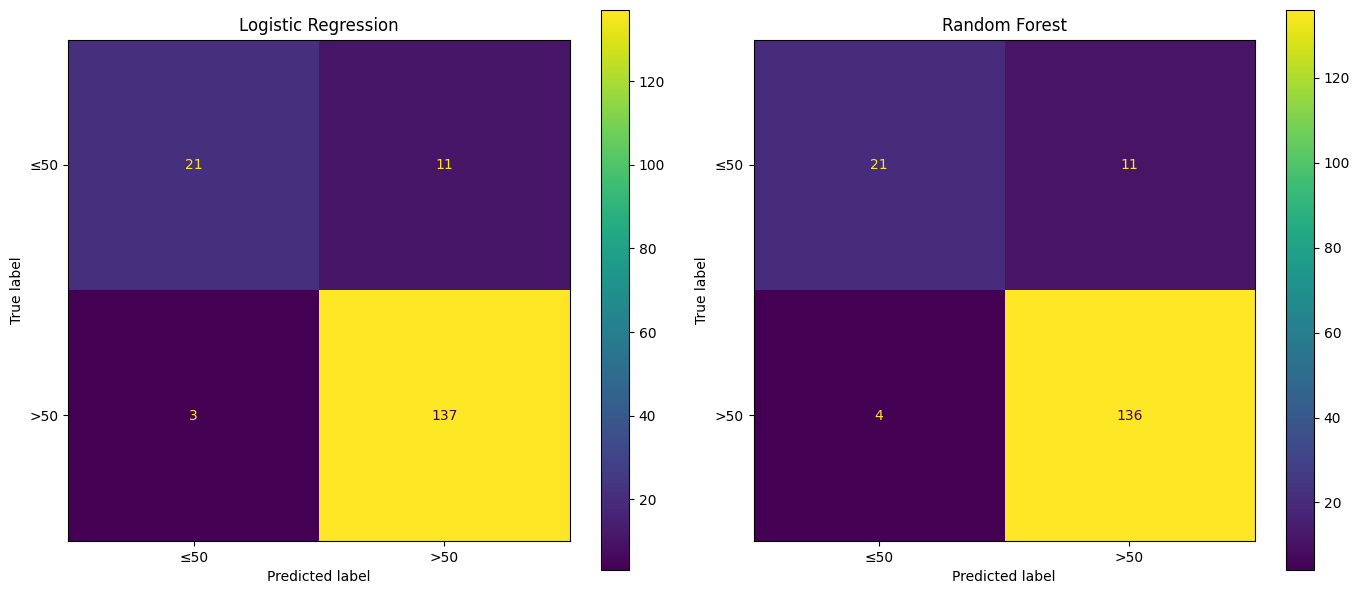

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)
print("For logistic regression")
print(f"Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_preds, target_names=["≤50", ">50"]))

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
print("\nfor random forest")
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_preds, target_names=["≤50", ">50"]))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["≤50", ">50"]).plot(ax=axs[0], values_format='d')
axs[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["≤50", ">50"]).plot(ax=axs[1], values_format='d')
axs[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [ ]:
#balance training with smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Logistic Regression After SMOTE
Accuracy: 0.8372
              precision    recall  f1-score   support

         ≤50       0.55      0.75      0.63        32
         >50       0.94      0.86      0.90       140

    accuracy                           0.84       172
   macro avg       0.74      0.80      0.76       172
weighted avg       0.86      0.84      0.85       172


Random Forest After SMOTE
Accuracy: 0.8953
              precision    recall  f1-score   support

         ≤50       0.71      0.75      0.73        32
         >50       0.94      0.93      0.94       140

    accuracy                           0.90       172
   macro avg       0.82      0.84      0.83       172
weighted avg       0.90      0.90      0.90       172



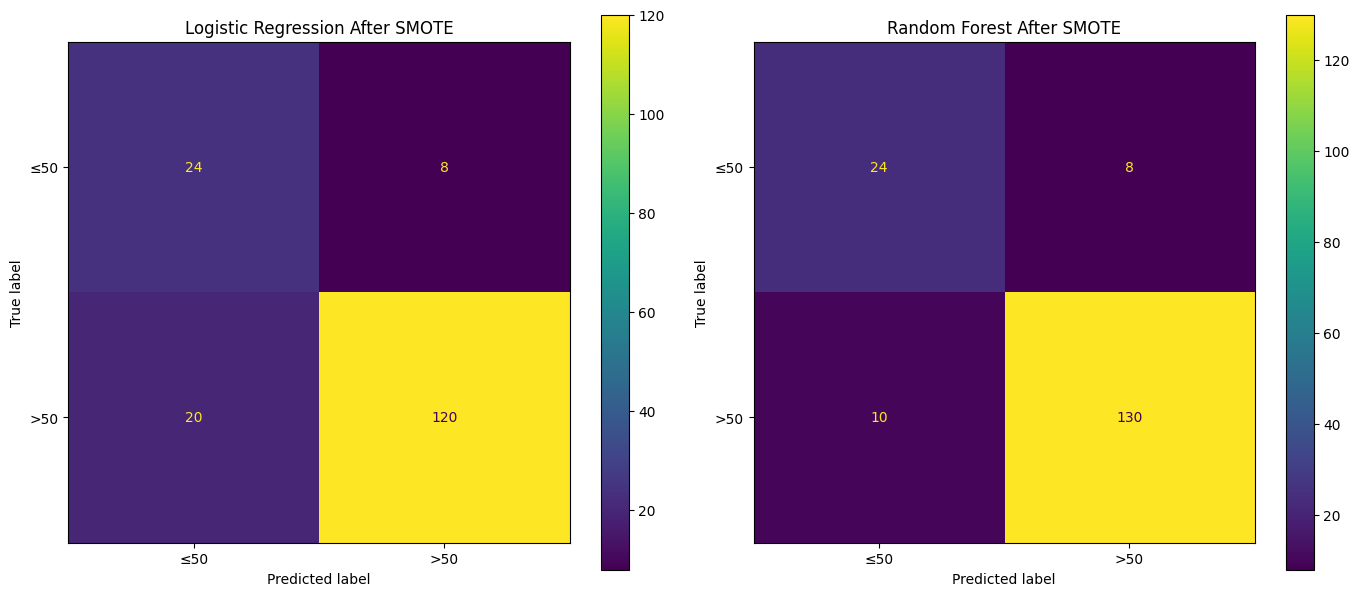

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)
lr_preds = lr.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
rf_preds = rf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)
print("Logistic Regression After SMOTE")
print(f"Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_preds, target_names=["≤50", ">50"]))
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
print("\nRandom Forest After SMOTE")
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_preds, target_names=["≤50", ">50"]))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["≤50", ">50"]).plot(ax=axs[0], values_format='d')
axs[0].set_title("Logistic Regression After SMOTE")

ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["≤50", ">50"]).plot(ax=axs[1], values_format='d')
axs[1].set_title("Random Forest After SMOTE")

plt.tight_layout()
plt.show()

Logistic Regression with Class Weights
Accuracy: 0.8488
              precision    recall  f1-score   support

         ≤50       0.57      0.75      0.65        32
         >50       0.94      0.87      0.90       140

    accuracy                           0.85       172
   macro avg       0.75      0.81      0.78       172
weighted avg       0.87      0.85      0.86       172



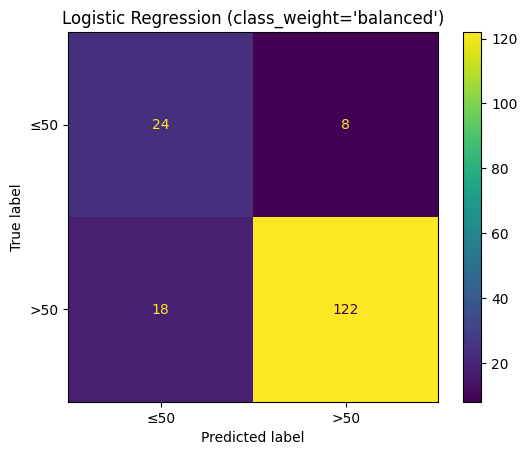

In [ ]:
lr_weighted = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_weighted.fit(X_train, y_train)
lr_weighted_preds = lr_weighted.predict(X_test)

lr_weighted_accuracy = accuracy_score(y_test, lr_weighted_preds)
lr_weighted_cm = confusion_matrix(y_test, lr_weighted_preds)

print("Logistic Regression with Class Weights")
print(f"Accuracy: {lr_weighted_accuracy:.4f}")
print(classification_report(y_test, lr_weighted_preds, target_names=["≤50", ">50"]))

ConfusionMatrixDisplay(confusion_matrix=lr_weighted_cm, display_labels=["≤50", ">50"]).plot(values_format='d')
plt.title("Logistic Regression (class_weight='balanced')")
plt.show()

more balance more better recall but lower accuracy, but very good for a 50 to 50% dataset after smote